<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/gsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravity Search Algorithm

In [0]:
from random import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

## Funkce pro vytvoření jedince

In [0]:
def createMember():
  result = {}
  result['position'] = {'x': rnd() * 10 - 5, 'y': rnd() * 10 - 5}
  result['velocity'] = {'x': 0, 'y': 0}
  result['force'] = {'x': 0, 'y': 0}
  result['mass'] = 1
  return result

## Funkce pro vytvoření skupiny / systému

In [0]:
def createSystem(count, createFunc):
  result = [] 
  for i in range(count):
    member = createFunc()
    result.append(member)
  return result
                 

## Funkce pro vyhodnocení jedince
Definuje kriteriální funkci. Implementované algoritmy optimalizují na maximum.

In [0]:
def evaluate(member):
  return -(member['position']['x'] * member['position']['x'] + member['position']['y'] * member['position']['y'])

## Zobrazení soustavy

In [0]:
def plotSystem(system, title):
  x = []
  y = []
  for member in system:
    x.append(member['position']['x'])
    y.append(member['position']['y'])

  plt.plot(x, y, 'ko', ms=3)
  plt.title(title)
  plt.show()

## Výpočet hmotností částic

In [0]:
def calculateMass(system, f):
  for member in system:
    member['value'] = f(member)
  
  minimum = system[0]['value']
  maximum = minimum
  sumation = 0

  for member in system:
    cValue = member['value']
    sumation = sumation + cValue
    if cValue < minimum:
      minimum = cValue
    if cValue > maximum:
      maximum = cValue

  func = lambda cValue: 1
  if maximum > minimum:
    func = lambda cValue: (cValue - minimum) / (maximum - minimum)

  sumM = 0
  for member in system:
    cValue = member['value']
    cMass = func(cValue)
    member['mass'] = cMass
    sumM = sumM + cMass

  for member in system:
    member['mass'] = member['mass'] / sumM

  return system
  


## Výpočet silového působení

In [0]:
from math import sqrt
def calculateForce(memberA, memberB, g):
  result = {'x': 0, 'y': 0}
  distance = {
      'x': memberB['position']['x'] - memberA['position']['x'],
      'y': memberB['position']['y'] - memberA['position']['y']
              }
  distanceAbs = sqrt(distance['x'] * distance['x'] + distance['y'] * distance['y'])
  # F = g * MA * MB / (d * d)
  F = g * memberA['mass'] * memberB['mass'] / (distanceAbs * distanceAbs)
  result['x'] = F * distance['x'] / distanceAbs
  result['y'] = F * distance['y'] / distanceAbs
  return result

def calculateForces(system, g):
  for member in system:
    member['force'] = {'x': 0, 'y': 0}

  for memberA in system:
    sumForce = {'x': 0, 'y': 0}
    for memberB in system:
      if memberA == memberB:
        continue
      currentForce = calculateForce(memberA, memberB, g)
      sumForce['x'] = sumForce['x'] + currentForce['x']
      sumForce['y'] = sumForce['y'] + currentForce['y']
    memberA['force'] = sumForce
  return system



## Výpočet pohybu

In [0]:
def calculateAccelerations(system):
  for member in system:
    # F = m * a
    force = member['force']
    mass = member['mass'] + 1e-3
    member['acceleration'] = {'x': force['x'] / mass, 'y': force['y'] / mass }
  return system

def calculateVelocities(system, dt, decelerationCoef = 0.1):
  for member in system:
    acceleration = member['acceleration']
    velocity = member['velocity']
    r = rnd()
    member['velocity'] = {
        'x': r * decelerationCoef * velocity['x'] + dt * acceleration['x'],
        'y': r * decelerationCoef * velocity['y'] + dt * acceleration['y']}
  return system

def calculatePositions(system, dt):
  for member in system:
    position = member['position']
    velocity = member['velocity']
    member['position'] = {
        'x': position['x'] + dt * velocity['x'],
        'y': position['y'] + dt * velocity['y']}
  return system


## Výpočet gravitační konstanty

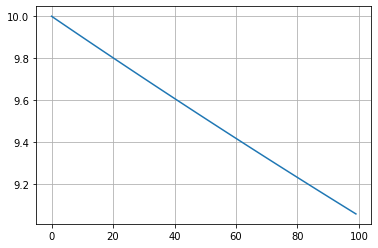

In [9]:
import math

def G(initialValue, alpha, maxiter):
  coefficient = math.e ** (-alpha / maxiter)
  currentValue = initialValue
  while True:
    yield currentValue
    currentValue = currentValue * coefficient


x = []
y = []
g = G(10, 0.1, 100)
for cx, cy in zip(range(100), g):
  x = x + [cx]
  y = y + [cy]

plt.plot(x, y)
plt.grid(which='both')
plt.show()

## Výpočet celkové energie systému

In [0]:
def calculateEnergy(system):
  result = 0
  for s in system:
    v2 = s['velocity']['x'] * s['velocity']['x'] + s['velocity']['y'] * s['velocity']['y']
    m = s['mass']
    E = 0.5 * m * v2
    result = result + E
  return result

## Simulace

In [0]:
def simulationStep(system, dt, g):
  calculatePositions(system, dt)
  calculateMass(system, f = evaluate)
  calculateForces(system, g = g)
  calculateAccelerations(system)
  calculateVelocities(system, dt)

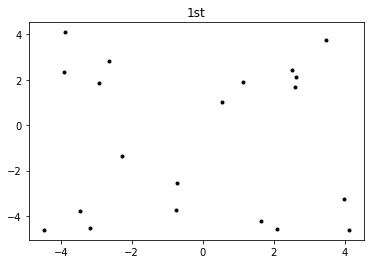

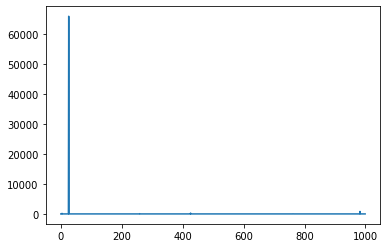

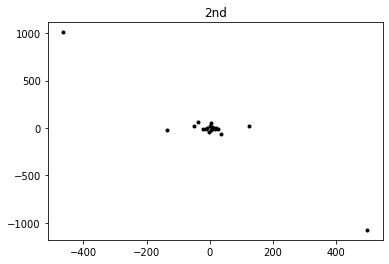

{'position': {'x': 499.00983556662385, 'y': -1074.6173929582126}, 'velocity': {'x': 0.0, 'y': 0.0}, 'force': {'x': 0.0, 'y': 0.0}, 'mass': 0.0, 'value': -1403813.3572405344, 'acceleration': {'x': 0.0, 'y': 0.0}}
{'position': {'x': -38.63185051557488, 'y': 58.5743880393887}, 'velocity': {'x': 7.11232366664332e-05, 'y': -0.0001323991564027659}, 'force': {'x': 3.809298989051245e-06, 'y': -7.091184676121052e-06}, 'mass': 0.05511569823476845, 'value': -4923.378808446605, 'acceleration': {'x': 6.78829473548466e-05, 'y': -0.0001263672180724548}}
{'position': {'x': -7.0033697352854105, 'y': -3.611978964073719}, 'velocity': {'x': -0.0004958665204512877, 'y': -0.0007465064366923256}, 'force': {'x': -2.5681399243160972e-05, 'y': -3.8659376745224004e-05}, 'mass': 0.05530723090269264, 'value': -62.0935796860227, 'acceleration': {'x': -0.00045609416111302455, 'y': -0.0006865792567926706}}


In [12]:
system = createSystem(20, createMember)

plotSystem(system, title='1st')

iterations = 1000
E = []
for i, g in zip(range(iterations), G(initialValue = 0.981, alpha = 0.1, maxiter = iterations)):
  simulationStep(system, dt = 1, g = g)
  E.append(calculateEnergy(system))
  system.sort(key = lambda item: item['value'])

plt.plot(E)
#plt.label('Energy')
plt.show()

plotSystem(system, title='2nd')

#systemDF = pd.DataFrame(system)
#display(systemDF)

print(system[0])
print(system[5])
print(system[-1])